# Negative 비율별로 카운트

Negative Ratio가 1인 파일 개수: 19521
Negative Ratio가 0.9 ~ 1.0인 파일 개수: 30
Negative Ratio가 0.8 ~ 0.9인 파일 개수: 24
Negative Ratio가 0.7 ~ 0.8인 파일 개수: 24
Negative Ratio가 0.6 ~ 0.7인 파일 개수: 22
Negative Ratio가 0.5 ~ 0.6인 파일 개수: 15
Negative Ratio가 0.4 ~ 0.5인 파일 개수: 15
Negative Ratio가 0.3 ~ 0.4인 파일 개수: 22
Negative Ratio가 0.2 ~ 0.3인 파일 개수: 18
Negative Ratio가 0.1 ~ 0.2인 파일 개수: 147
Negative Ratio가 0.0 ~ 0.1인 파일 개수: 0


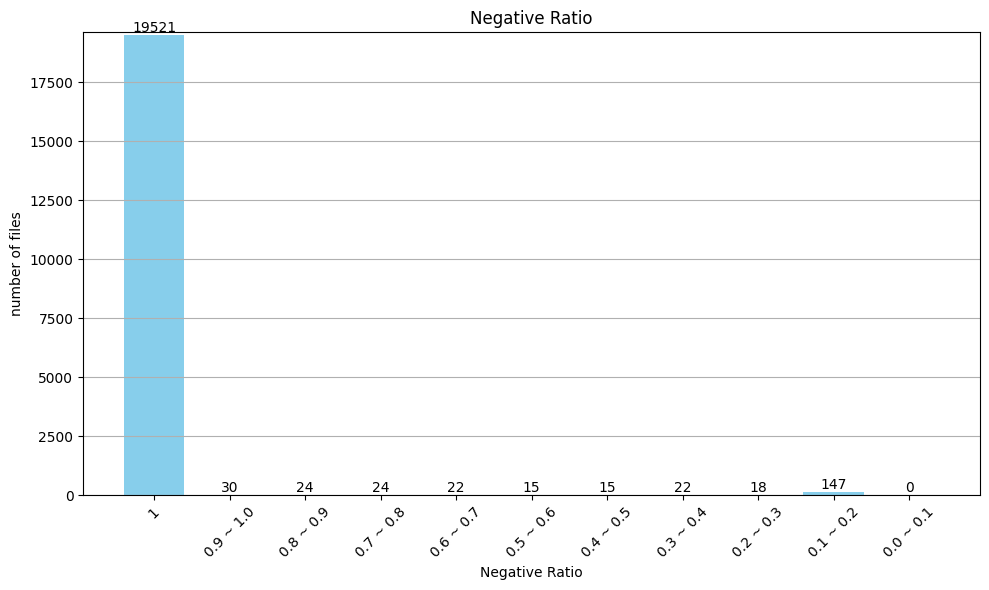

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# 결과 파일 로드
output_file = "/home/woonj/grad-cam/cam_analysis_results.txt"
data = pd.read_csv(output_file, sep="\t")

# 비율 범위 설정
bins = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
labels = ['1', '0.9 ~ 1.0', '0.8 ~ 0.9', '0.7 ~ 0.8', '0.6 ~ 0.7', 
          '0.5 ~ 0.6', '0.4 ~ 0.5', '0.3 ~ 0.4', '0.2 ~ 0.3', '0.1 ~ 0.2', '0.0 ~ 0.1']

# 카운트를 저장할 딕셔너리
counts = {label: 0 for label in labels}

# 각 범위에 따라 파일 개수 세기
for i in range(len(bins) - 1):
    counts[labels[i]] = data[(data['Negative Ratio'] < bins[i] if i != 0 else data['Negative Ratio'] == bins[i]) & 
                             (data['Negative Ratio'] >= bins[i + 1])].shape[0]

# 결과 출력
for label, count in counts.items():
    print(f"Negative Ratio가 {label}인 파일 개수: {count}")

# 바 차트로 시각화
plt.figure(figsize=(10, 6))
values = list(counts.values())
bars = plt.bar(labels, values, color='skyblue')

# 바 위에 파일 개수 텍스트 추가
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# 차트 제목 및 레이블 설정
plt.title('Negative Ratio')
plt.xlabel('Negative Ratio')
plt.ylabel('number of files')

# y축의 범위 조정
plt.ylim(0, max(values) + 100)

# 차트 표시
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()